# title: Machine Learning Toolbox (caret)

## Ch1 Regression models: fitting them and eval their performance

In [1]:
require(data.table)
require(ggplot2)
## chap1 reg ex1  
head(diamonds,3)
# Fit lm model: model
model<-lm(price~.,data=diamonds) #on all dataset

# Predict on full data: p
p <-predict(model,diamonds)  #on all dataset

# Compute errors: error
error <- p -diamonds$price

# Calculate RMSE
rmse<-sqrt(mean(error^2))
print(paste("rmse on full data",rmse))

Loading required package: data.table
Loading required package: ggplot2


carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31


[1] "rmse on full data 1129.84298657309"


In [2]:
#ch1 regr  ex2
set.seed(42)
rows<-sample(nrow(diamonds))
length(rows)
diamonds<-diamonds[rows,] #randomized index

[1] 53940

In [3]:
#ch1 regr ex3 80/20 split
split<-round(nrow(diamonds) *.80)
train<- diamonds[1:split,] # using 80% of resampled index 
                            # in previous step
test <- diamonds[(split+1):nrow(diamonds),]

nrow(diamonds) == nrow(train)+nrow(test)

[1] TRUE

In [4]:
#ch1 regr predict on test set
model <- lm(price~.,data=train)
p<-predict(model,newdata=test)
error<-test$price -p
rmse<-sqrt( mean(error^2) )
print(paste("rmse on test data",rmse)) #> than rmse on full

[1] "rmse on test data 1136.59565324766"


In [5]:
#ch1 lin reg  cross validation using caret syntax video
library(caret)
dim(mtcars)
set.seed(42)
tr_ctrl<-trainControl(method="cv",number=10,
                       verboseIter = T)
model <- train(mpg ~ hp, data=mtcars,
               method="lm",
               trControl=tr_ctrl )


Loading required package: lattice


[1] 32 11

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


In [6]:
#ch1 regr  ex 10x cross-validation on diamonds
set.seed(42)
# Fit lm model using 10-fold CV: model
model <- train(
  price ~ ., diamonds,
  method = "lm",
  trControl = trainControl(
    method = "cv", number = 10,
    verboseIter = TRUE
  )
)
model

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

53940 samples
    9 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 48546, 48546, 48545, 48546, 48546, 48546, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1131.205  0.9196745  740.5186

Tuning parameter 'intercept' was held constant at a value of TRUE

In [7]:
#ch1 5-fold cross validation ex
require(MASS)
data(Boston)
set.seed(42)
tr_ctrl<-trainControl(method="cv",number=5,
                       verboseIter = T)
model <- train(medv ~ ., data=Boston,
               method="lm",
               trControl=tr_ctrl )

model

Loading required package: MASS


+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 404, 404, 406, 406, 404 
Resampling results:

  RMSE      Rsquared   MAE     
  4.865282  0.7230966  3.389431

Tuning parameter 'intercept' was held constant at a value of TRUE

In [8]:
#ch1 5x5fold cross validation ex
require(MASS)
set.seed(42)
tr_ctrl<-trainControl(method="cv",number=5,
                      repeats=5,
                       verboseIter = T)
model <- train(medv ~ ., data=Boston,
               method="lm",
               trControl=tr_ctrl )

model

Warning message:
“`repeats` has no meaning for this resampling method.”

+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 404, 404, 406, 406, 404 
Resampling results:

  RMSE      Rsquared   MAE     
  4.865282  0.7230966  3.389431

Tuning parameter 'intercept' was held constant at a value of TRUE

In [9]:
#ch1 ex making predictions on new data
pred<-predict(model,new_data=Boston)
pred[1:3]

1        2        3 
30.00384 25.02556 30.56760

## Chap2 classifications models

In [10]:
library(mlbench)
data(Sonar)
Sonar[1:6,c(1:5,61)]
#?Sonar
dim(Sonar)
# Class R - rock, M - metal

V1,V2,V3,V4,V5,Class
0.0200,0.0371,0.0428,0.0207,0.0954,R
0.0453,0.0523,0.0843,0.0689,0.1183,R
0.0262,0.0582,0.1099,0.1083,0.0974,R
0.0100,0.0171,0.0623,0.0205,0.0205,R
0.0762,0.0666,0.0481,0.0394,0.0590,R
0.0286,0.0453,0.0277,0.0174,0.0384,R


[1] 208  61

In [11]:
#ch2 ex 60/40 split
set.seed(42)
rows<-sample(nrow(Sonar))
Sonar<-Sonar[rows,] #reshuffled
split<-round(nrow(Sonar) * .60)
train<-Sonar[1:split,]
test<-Sonar[(split+1):nrow(Sonar),]


In [12]:
#?Sonar

In [13]:
#ch2  fit a logistic regression model with glm syntax
model <- glm(Class ~ ., data=train,family = "binomial")
p <- predict(model,newdata=test,type="response")
p_class <- ifelse(p> 0.5, "M","R")
#confusion matrix
tbl<-table(p_class,test$Class)
#using caret function
confusionMatrix(p_class, test$Class)


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M  8 18
         R 40 17
                                          
               Accuracy : 0.3012          
                 95% CI : (0.2053, 0.4118)
    No Information Rate : 0.5783          
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : -0.3204         
 Mcnemar's Test P-Value : 0.005826        
                                          
            Sensitivity : 0.16667         
            Specificity : 0.48571         
         Pos Pred Value : 0.30769         
         Neg Pred Value : 0.29825         
             Prevalence : 0.57831         
         Detection Rate : 0.09639         
   Detection Prevalence : 0.31325         
      Balanced Accuracy : 0.32619         
                                          
       'Positive' Class : M               
                                          

#### Sensitivity (true positive rate)

In [14]:
#tbl
#tbl[,1] # first column
#tbl[,2] #second column
# M == T, R == F
true_pos_rate_or_sensitivity <- tbl[1,1]/sum(tbl[,1]) #ratio of TP  over all actual TRUE (TP + FN)
paste("true positive rate",true_pos_rate_or_sensitivity)



[1] "true positive rate 0.166666666666667"

#### Specificity  (true negative rate)

In [15]:
 #ratio of TN over all actual FALSe (TN + FP)
true_neg_rate_or_specificity <- tbl[2,2]/sum(tbl[,2])
paste("true negative rate", true_neg_rate_or_specificity)

[1] "true negative rate 0.485714285714286"

In [16]:
##ch2 ex Try another threshold
#increase odds of very likely mines
p_class <- ifelse(p > 0.9, "M","R") 
confusionMatrix(p_class, test[["Class"]])

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M  8 17
         R 40 18
                                          
               Accuracy : 0.3133          
                 95% CI : (0.2159, 0.4244)
    No Information Rate : 0.5783          
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : -0.293          
 Mcnemar's Test P-Value : 0.003569        
                                          
            Sensitivity : 0.16667         
            Specificity : 0.51429         
         Pos Pred Value : 0.32000         
         Neg Pred Value : 0.31034         
             Prevalence : 0.57831         
         Detection Rate : 0.09639         
   Detection Prevalence : 0.30120         
      Balanced Accuracy : 0.34048         
                                          
       'Positive' Class : M               
                                          

In [17]:
##ch2 ex from probabilities to confusion matrix
#increase odds of all potentials mines
p_class <- ifelse(p > 0.10, "M","R") 
confusionMatrix(p_class, test[["Class"]])

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M  8 20
         R 40 15
                                          
               Accuracy : 0.2771          
                 95% CI : (0.1845, 0.3862)
    No Information Rate : 0.5783          
    P-Value [Acc > NIR] : 1.00000         
                                          
                  Kappa : -0.3757         
 Mcnemar's Test P-Value : 0.01417         
                                          
            Sensitivity : 0.16667         
            Specificity : 0.42857         
         Pos Pred Value : 0.28571         
         Neg Pred Value : 0.27273         
             Prevalence : 0.57831         
         Detection Rate : 0.09639         
   Detection Prevalence : 0.33735         
      Balanced Accuracy : 0.29762         
                                          
       'Positive' Class : M               
                                          

M vs. R,0.7452381


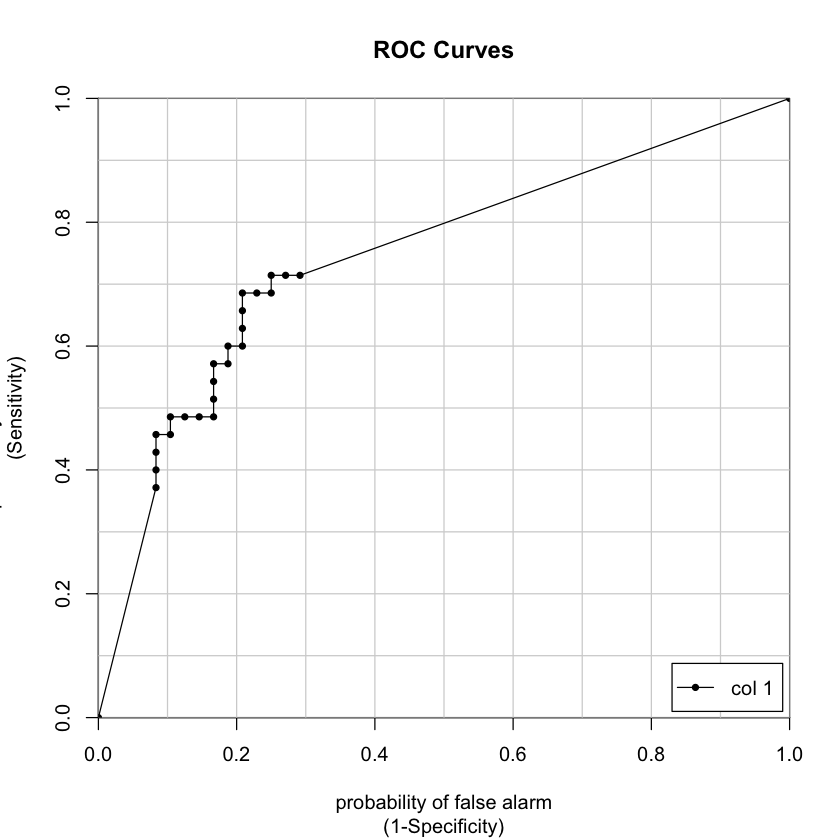

In [18]:
#ch2 plotting a ROC curve video
library(caTools)
colAUC(p,test[["Class"]],plotROC=T)

In [19]:
##ch2 ex customize train control  to compute AUC , using custom 
myControl <- trainControl(
  method = "cv",
  number = 10,
  summaryFunction = twoClassSummary, #rather than defaultSummary
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

model<-train(Class~., data=Sonar,  #full data set we are doing cross validation
            method="glm", family="binomial",
            trControl=myControl)  #cv in trainControl

model #it will print the roc

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

+ Fold01: parameter=none 


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold01: parameter=none 
+ Fold02: parameter=none 


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold02: parameter=none 
+ Fold03: parameter=none 


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold03: parameter=none 
+ Fold04: parameter=none 


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold04: parameter=none 
+ Fold05: parameter=none 


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold05: parameter=none 
+ Fold06: parameter=none 


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold06: parameter=none 
+ Fold07: parameter=none 


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold07: parameter=none 
+ Fold08: parameter=none 


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold08: parameter=none 
+ Fold09: parameter=none 


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold09: parameter=none 
+ Fold10: parameter=none 


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

208 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 188, 187, 187, 187, 187, 187, ... 
Resampling results:

  ROC        Sens       Spec     
  0.7438258  0.7651515  0.7311111


In [20]:
str(Sonar)

'data.frame':	208 obs. of  61 variables:
 $ V1   : num  0.0156 0.0203 0.0225 0.0134 0.0443 0.0116 0.0712 0.0177 0.115 0.0412 ...
 $ V2   : num  0.021 0.0121 0.0019 0.0172 0.0446 ...
 $ V3   : num  0.0282 0.038 0.0075 0.0178 0.0235 ...
 $ V4   : num  0.0596 0.0128 0.0097 0.0363 0.1008 ...
 $ V5   : num  0.0462 0.0537 0.0445 0.0444 0.2252 ...
 $ V6   : num  0.0779 0.0874 0.0906 0.0744 0.2611 ...
 $ V7   : num  0.1365 0.1021 0.0889 0.08 0.2061 ...
 $ V8   : num  0.078 0.0852 0.0655 0.0456 0.1668 ...
 $ V9   : num  0.1038 0.1136 0.1624 0.0368 0.1801 ...
 $ V10  : num  0.157 0.175 0.145 0.125 0.308 ...
 $ V11  : num  0.248 0.22 0.144 0.24 0.379 ...
 $ V12  : num  0.2783 0.2721 0.0948 0.2325 0.5364 ...
 $ V13  : num  0.2896 0.2105 0.0618 0.2523 0.6173 ...
 $ V14  : num  0.296 0.173 0.164 0.147 0.784 ...
 $ V15  : num  0.3189 0.204 0.0708 0.0669 0.8392 ...
 $ V16  : num  0.1892 0.1786 0.0844 0.11 0.9016 ...
 $ V17  : num  0.173 0.132 0.259 0.235 1 ...
 $ V18  : num  0.223 0.226 0.268 0.328 0.

### ch2 random forest video.

* Random forests robusts for overfitting. yield accurate results for non linear models
* random forets have hyper parameters 
* rf  go over many decision trees with each fit on different bootstrap sample of original DS
* this is called bootstrap aggregation or bagging

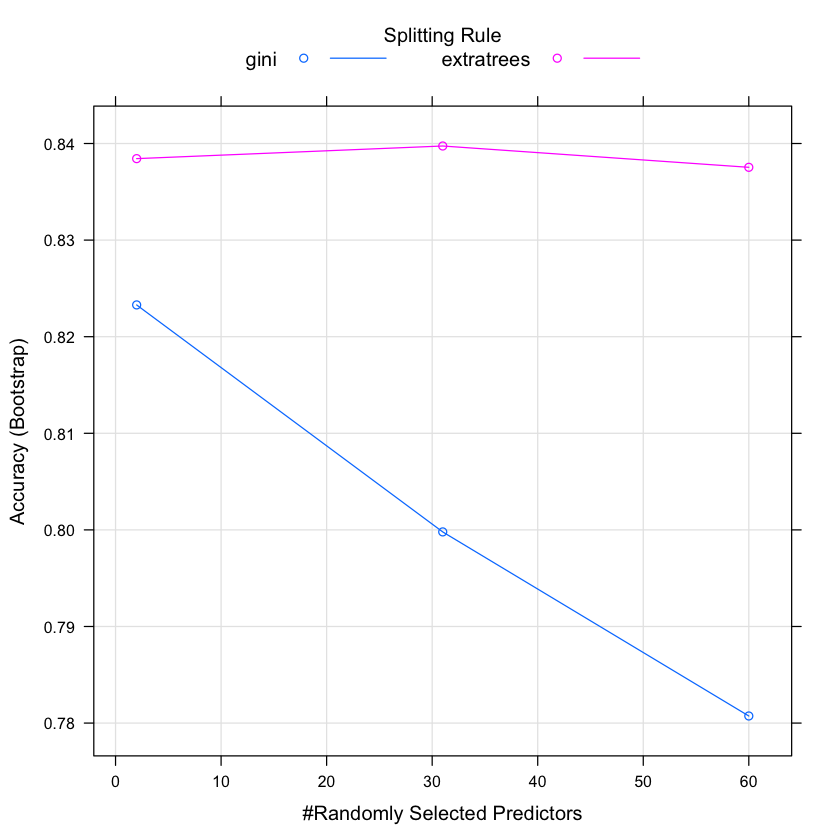

In [21]:
library(mlbench)
data(Sonar)
set.seed(42)
model <- train(Class~., data=Sonar, method="ranger")
#plot results
plot(model)

+ Fold1: mtry= 2, min.node.size=1, splitrule=gini 
- Fold1: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold1: mtry=31, min.node.size=1, splitrule=gini 
- Fold1: mtry=31, min.node.size=1, splitrule=gini 
+ Fold1: mtry=60, min.node.size=1, splitrule=gini 
- Fold1: mtry=60, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=31, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=31, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=60, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=60, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=1, splitrule=gini 
- Fold2: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold2: mtry=31, min.node.size=1, splitrule=gini 
- Fold2: mtry=31, min.node.size=1, splitrule=gini 
+ Fold2: mtry=60, min.node.size=1, splitrule=gini 
- Fold2: mtry=60, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 2, min.node.size=1, splitrule=e

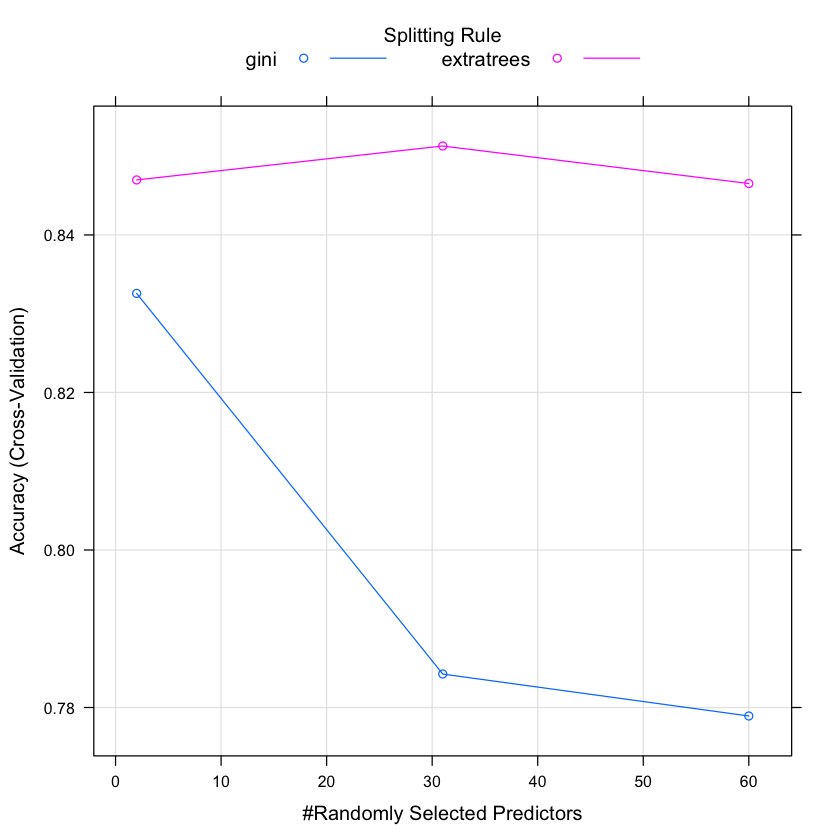

In [22]:
set.seed(42)
myControl <- trainControl(method = "cv", number = 5, verboseIter = TRUE)
model <- train(Class~., data=Sonar, method="ranger", trControl=myControl)
plot(model)

+ Fold1: mtry= 2, min.node.size=1, splitrule=gini 
- Fold1: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 4, min.node.size=1, splitrule=gini 
- Fold1: mtry= 4, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 7, min.node.size=1, splitrule=gini 
- Fold1: mtry= 7, min.node.size=1, splitrule=gini 
+ Fold1: mtry=10, min.node.size=1, splitrule=gini 
- Fold1: mtry=10, min.node.size=1, splitrule=gini 
+ Fold1: mtry=13, min.node.size=1, splitrule=gini 
- Fold1: mtry=13, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry= 4, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 4, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry= 7, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 7, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=10, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=10, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=13, min.node.size=1,

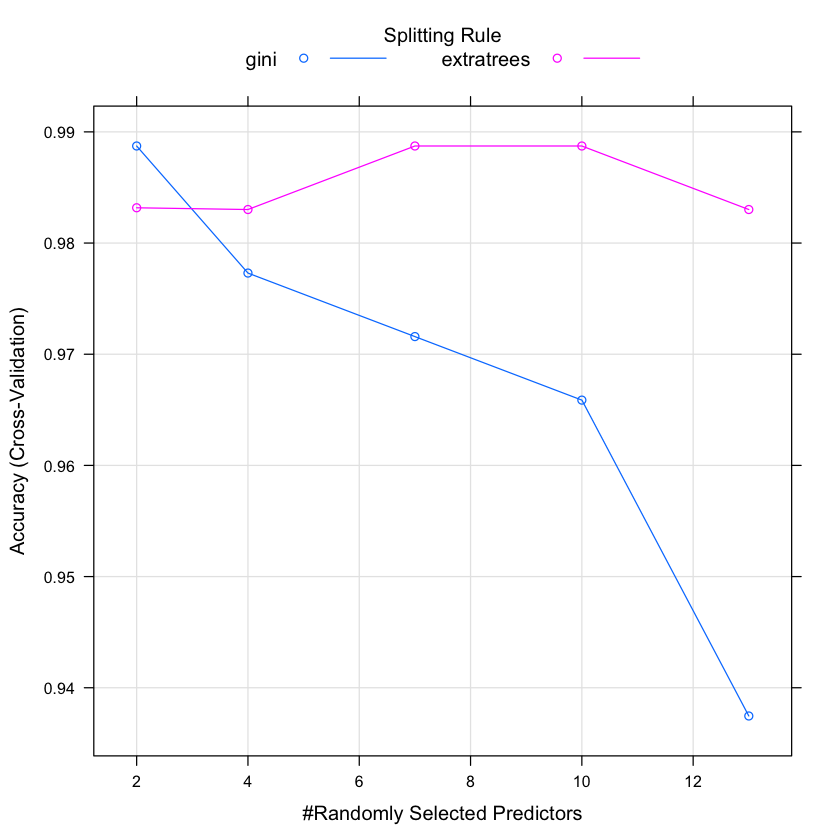

In [23]:
#ch2 fit a random forest
library(rattle.data)
data(wine)
#str(wine)
#summary(factor(wine$Type))

model <- train(
  Type~.,
  tuneLength = 5, #default value tuneLenght=3
  data = wine, method = "ranger",
  trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE)
)
plot(model)

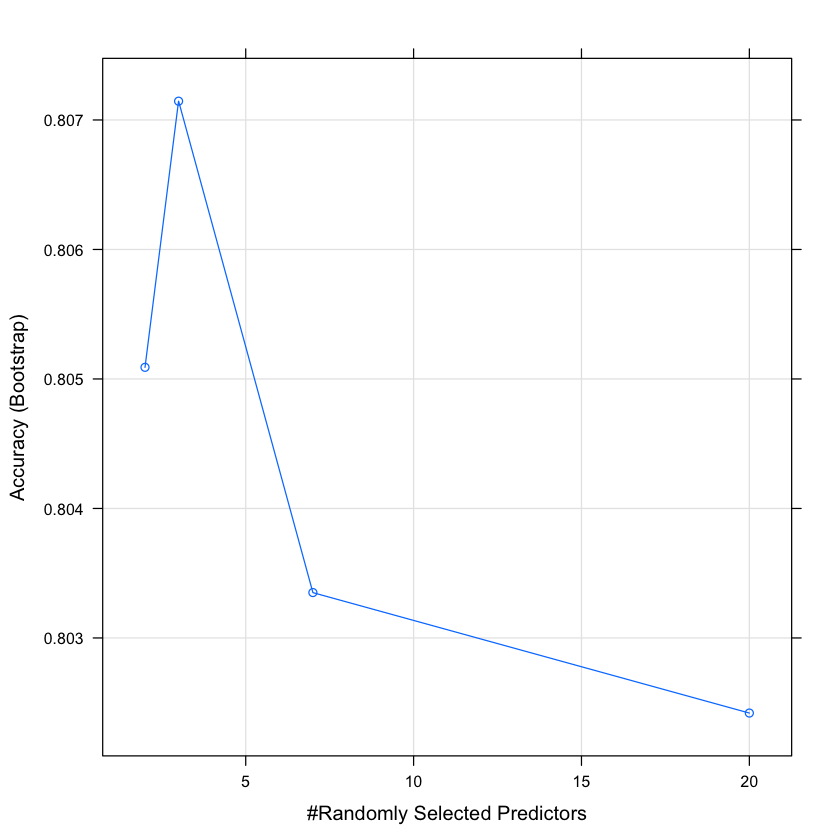

In [24]:
# custom tuning grids video
# gives full control on tuning params
# e.g. random forest have a single tuning hyperparam mtry  to optimze

mtry<-c(2,3,7,20)
myGrid <- expand.grid(.mtry = mtry, .splitrule = "gini", .min.node.size = 10)
set.seed(42)
model<-train(Class ~ ., data=Sonar, method="ranger", tuneGrid=myGrid)
plot(model)

In [25]:
overfit <-read.csv("http://s3.amazonaws.com/assets.datacamp.com/production/course_1048/datasets/overfit.csv")

dim(overfit)
#str(overfit)  #y is factor with two levels, 201 features


[1] 250 201

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

+ Fold01: alpha=0.10, lambda=0.01013 
- Fold01: alpha=0.10, lambda=0.01013 
+ Fold01: alpha=0.55, lambda=0.01013 
- Fold01: alpha=0.55, lambda=0.01013 
+ Fold01: alpha=1.00, lambda=0.01013 
- Fold01: alpha=1.00, lambda=0.01013 
+ Fold02: alpha=0.10, lambda=0.01013 
- Fold02: alpha=0.10, lambda=0.01013 
+ Fold02: alpha=0.55, lambda=0.01013 
- Fold02: alpha=0.55, lambda=0.01013 
+ Fold02: alpha=1.00, lambda=0.01013 
- Fold02: alpha=1.00, lambda=0.01013 
+ Fold03: alpha=0.10, lambda=0.01013 
- Fold03: alpha=0.10, lambda=0.01013 
+ Fold03: alpha=0.55, lambda=0.01013 
- Fold03: alpha=0.55, lambda=0.01013 
+ Fold03: alpha=1.00, lambda=0.01013 
- Fold03: alpha=1.00, lambda=0.01013 
+ Fold04: alpha=0.10, lambda=0.01013 
- Fold04: alpha=0.10, lambda=0.01013 
+ Fold04: alpha=0.55, lambda=0.01013 
- Fold04: alpha=0.55, lambda=0.01013 
+ Fold04: alpha=1.00, lambda=0.01013 
- Fold04: alpha=1.00, lambda=0.01013 
+ Fold05: alpha=0.10, lambda=0.01013 
- Fold05: alpha=0.10, lambda=0.01013 
+ Fold05: al

[1] "max roc 0.458061594202899"

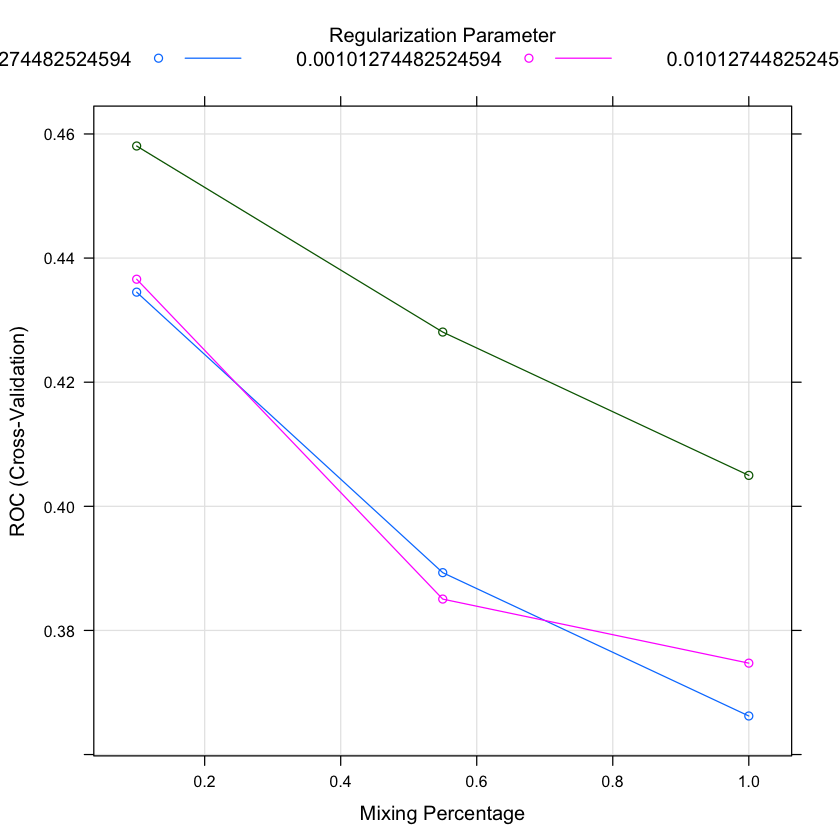

In [26]:
#introducing glmnet  for  linear regressions models  video
#alpha and lambda to tune

#custom trainControl defined fr
myControl <- trainControl(
    method="cv",number=10,
    summaryFunction= twoClassSummary,
    classProbs=TRUE, # super important
    verboseIter = TRUE)

#dim(overfit)

#tuning with defaults
set.seed(42)
model <- train(y ~ ., overfit, method="glmnet",
              trControl=myControl)
plot(model)

# Print maximum ROC statistic
paste("max roc",max(model[["results"]]$ROC))

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

+ Fold01: alpha=0, lambda=0.1 
- Fold01: alpha=0, lambda=0.1 
+ Fold01: alpha=1, lambda=0.1 
- Fold01: alpha=1, lambda=0.1 
+ Fold02: alpha=0, lambda=0.1 
- Fold02: alpha=0, lambda=0.1 
+ Fold02: alpha=1, lambda=0.1 
- Fold02: alpha=1, lambda=0.1 
+ Fold03: alpha=0, lambda=0.1 
- Fold03: alpha=0, lambda=0.1 
+ Fold03: alpha=1, lambda=0.1 
- Fold03: alpha=1, lambda=0.1 
+ Fold04: alpha=0, lambda=0.1 
- Fold04: alpha=0, lambda=0.1 
+ Fold04: alpha=1, lambda=0.1 
- Fold04: alpha=1, lambda=0.1 
+ Fold05: alpha=0, lambda=0.1 
- Fold05: alpha=0, lambda=0.1 
+ Fold05: alpha=1, lambda=0.1 
- Fold05: alpha=1, lambda=0.1 
+ Fold06: alpha=0, lambda=0.1 
- Fold06: alpha=0, lambda=0.1 
+ Fold06: alpha=1, lambda=0.1 
- Fold06: alpha=1, lambda=0.1 
+ Fold07: alpha=0, lambda=0.1 
- Fold07: alpha=0, lambda=0.1 
+ Fold07: alpha=1, lambda=0.1 
- Fold07: alpha=1, lambda=0.1 
+ Fold08: alpha=0, lambda=0.1 
- Fold08: alpha=0, lambda=0.1 
+ Fold08: alpha=1, lambda=0.1 
- Fold08: alpha=1, lambda=0.1 
+ Fold09

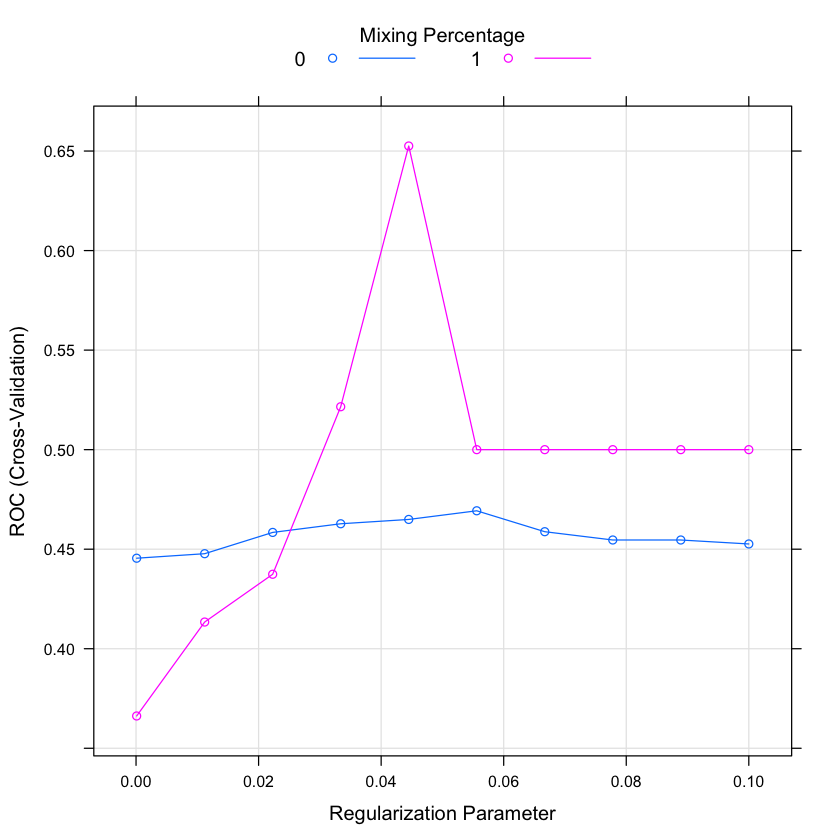

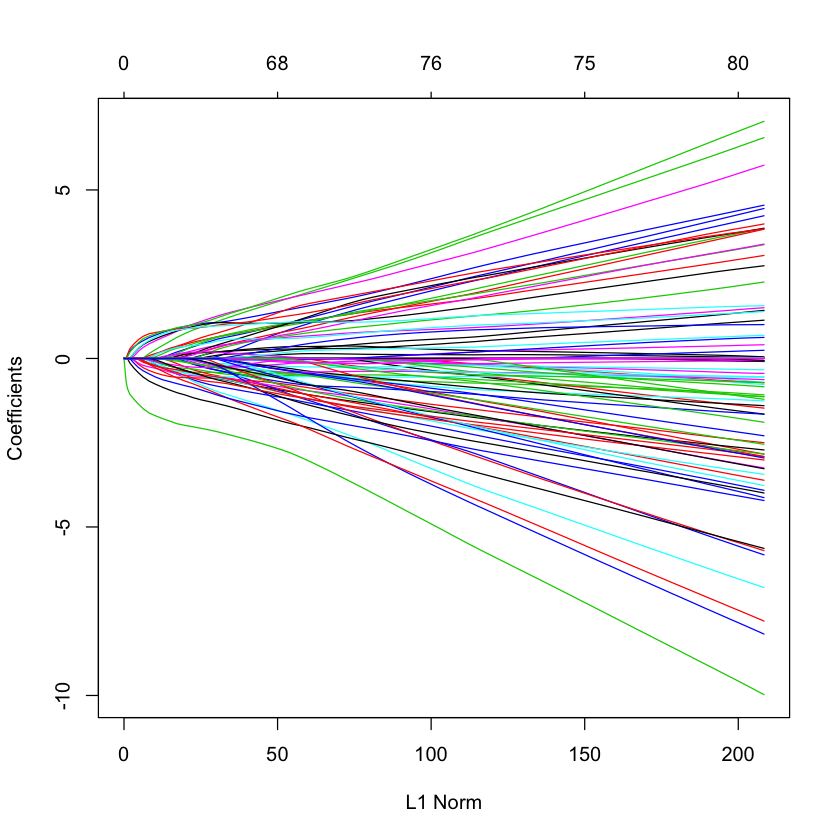

In [27]:
##glmne with custom tuning video
# alpha = 0 lasso, alpha = 1  ridge

myGrid <-expand.grid( alpha = 0:1, 
                     lambda=seq(0.0001,0.1, length=10 )
                    )
set.seed(42)
model <- train(y ~ ., overfit, method="glmnet",
               tuneGrid= myGrid,
              trControl=myControl)
plot(model)

#full regularization path
plot(model$finalModel)

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

+ Fold01: alpha=0, lambda=1 
- Fold01: alpha=0, lambda=1 
+ Fold01: alpha=1, lambda=1 
- Fold01: alpha=1, lambda=1 
+ Fold02: alpha=0, lambda=1 
- Fold02: alpha=0, lambda=1 
+ Fold02: alpha=1, lambda=1 
- Fold02: alpha=1, lambda=1 
+ Fold03: alpha=0, lambda=1 
- Fold03: alpha=0, lambda=1 
+ Fold03: alpha=1, lambda=1 
- Fold03: alpha=1, lambda=1 
+ Fold04: alpha=0, lambda=1 
- Fold04: alpha=0, lambda=1 
+ Fold04: alpha=1, lambda=1 
- Fold04: alpha=1, lambda=1 
+ Fold05: alpha=0, lambda=1 
- Fold05: alpha=0, lambda=1 
+ Fold05: alpha=1, lambda=1 
- Fold05: alpha=1, lambda=1 
+ Fold06: alpha=0, lambda=1 
- Fold06: alpha=0, lambda=1 
+ Fold06: alpha=1, lambda=1 
- Fold06: alpha=1, lambda=1 
+ Fold07: alpha=0, lambda=1 
- Fold07: alpha=0, lambda=1 
+ Fold07: alpha=1, lambda=1 
- Fold07: alpha=1, lambda=1 
+ Fold08: alpha=0, lambda=1 
- Fold08: alpha=0, lambda=1 
+ Fold08: alpha=1, lambda=1 
- Fold08: alpha=1, lambda=1 
+ Fold09: alpha=0, lambda=1 
- Fold09: alpha=0, lambda=1 
+ Fold09: alph

[1] 0.5210145

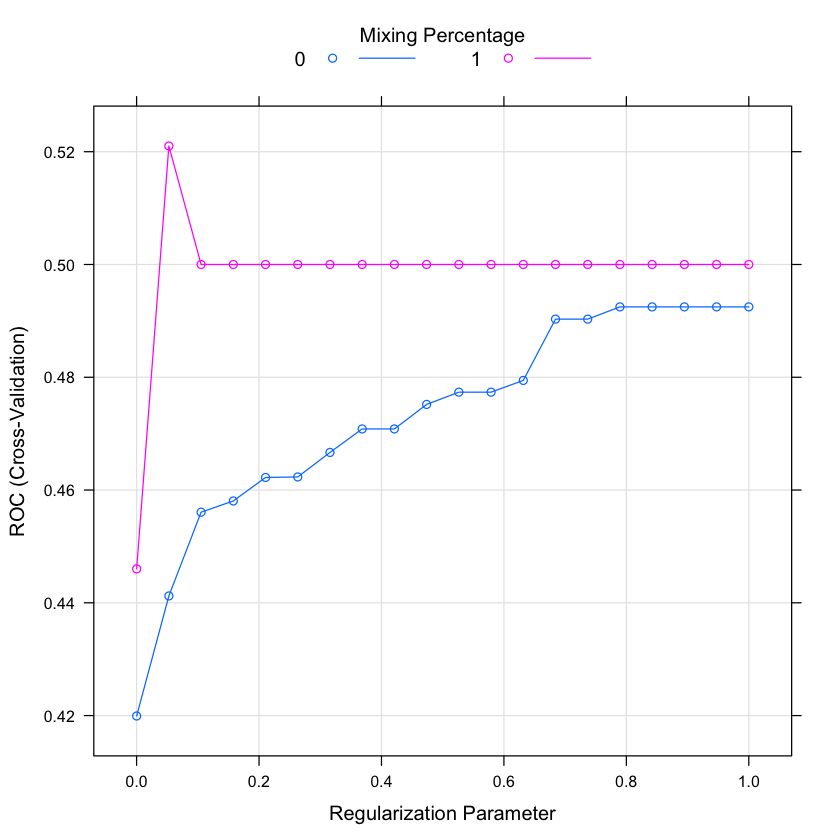

In [28]:
#glmnet with custom trainControl and tuning  ex

myControl <- trainControl(
    method="cv",number=10,
    summaryFunction= twoClassSummary,
    classProbs=TRUE, # super important
    verboseIter = TRUE)

myGrid <-expand.grid( alpha = 0:1, 
                    lambda=seq(0.0001,1, length=20))

model <- train(
  y ~ ., overfit,
  tuneGrid = myGrid,
  method = "glmnet",
  trControl = myControl
)

# Print model to console
print(model)

#plot model
plot(model)
# Print maximum ROC statistic
max(model[["results"]]$ROC)

## ch4 Preprocessing your data

#### strategies with missing values

!NB most models require numbers, can not handle missing data 

* Remove rows with missing data (can remove a lot of data -> biased dataset)
* median imputation : replace missing values with medians (this works well if data is missing at random (MAR)
* knn imputation: replace missing values according to neighbours (works well if data is not missing at random)


In [29]:
### video 1 example  how to insert NAS at random in mtcars
data(mtcars)
set.seed(42)
mtcars[sample(1:nrow(mtcars), 10), "hp"] <- NA  #insert 10 NAs at random
Y <- mtcars$mpg 
X <-mtcars[,2:4]

#model <- train(X,Y) #fails 

model <- train(X,Y, preProcess = "medianImpute") #median imputation takes care of all missing hp

print(model)


note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

Random Forest 

32 samples
 3 predictor

Pre-processing: median imputation (3) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     2.618951  0.8232965  2.192858
  3     2.599192  0.8274706  2.174464

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 3.


In [30]:
#ch4 ex1 apply median imputation
require(mlbench)
data(BreastCancer)
bc<-data.table(BreastCancer)
response<-"Class"
breast_cancer_y <- bc[,.SD,.SDcols=response][[1]]
predictors <- names(bc)[!(names(bc) %in% c(response, "Id"))]
breast_cancer_x <- bc[,.SD, .SDcols=predictors]

#str(breast_cancer_x)
#str(breast_cancer_y)

In [31]:
sum(is.na(bc)) #we have 16 rows with nas

[1] 16

In [49]:

myControl <- trainControl(
    method="cv",number=10,repeats=1,
    summaryFunction= twoClassSummary,
    classProbs=TRUE, # super important
    verboseIter = TRUE)

set.seed(41)
model<- train(x=breast_cancer_x, y=breast_cancer_y,
             method="glm",
             trControl=myControl,
             preProcess="medianImpute")

print(model)

Warning message:
“`repeats` has no meaning for this resampling method.”Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

+ Fold01: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold01: parameter=none 
+ Fold02: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold02: parameter=none 
+ Fold03: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold03: parameter=none 
+ Fold04: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold04: parameter=none 
+ Fold05: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold05: parameter=none 
+ Fold06: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold06: parameter=none 
+ Fold07: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold07: parameter=none 
+ Fold08: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold08: parameter=none 
+ Fold09: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold09: parameter=none 
+ Fold10: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: ignore (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 629, 629, 630, 630, 629, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9377647  0.9640337  0.8693696



In [35]:
#summary(model)

In [61]:
## video  knn imputation, when data missing is not MAR
data(mtcars)
mtcars[mtcars$disp <140, "hp"] <- NA  
Y <- mtcars$mpg 
X <-mtcars[,2:4]

set.seed(41)
model <- train(X,Y, method="glm",preProcess = "medianImpute")
print(min(model$results$RMSE))

model_a <- train(X,Y, method="glm",preProcess = "knnImpute")
print(min(model_a$results$RMSE))

#we have a lower RMSE  with "knnImpute"  NAs are not MAR


[1] 3.605736
[1] 3.422229


In [40]:

model2<- train(x=breast_cancer_x, y=breast_cancer_y,
             method="glm",
             trControl=myControl,
             preProcess="medianImpute")

print(model)

Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

+ Fold01: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold01: parameter=none 
+ Fold02: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold02: parameter=none 
+ Fold03: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold03: parameter=none 
+ Fold04: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold04: parameter=none 
+ Fold05: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold05: parameter=none 
+ Fold06: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold06: parameter=none 
+ Fold07: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold07: parameter=none 
+ Fold08: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold08: parameter=none 
+ Fold09: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold09: parameter=none 
+ Fold10: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: ignore (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 630, 629, 629, 629, 629, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9330435  0.9617448  0.8447029



In [52]:
## video  multiple preprocessing

mtcars[sample(1:nrow(mtcars), 10), "hp"] <- NA  #insert 10 NAs at random
Y <- mtcars$mpg 
X <-mtcars[,2:4]

set.seed(41)
model <- train(X,Y, method="glm",
               preProcess = c("medianImpute", "center", "scale")  )
print(min(model$results$RMSE)) # we have a model improvement



Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“Std. deviations could not be computed for: hp”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“Std. deviations could not be computed for: hp”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

[1] 3.58949


In [50]:
#ex combining preprocessing methods
# Fit glm with median imputation: model1
model1 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "medianImpute"
)
# Print model1
print(model1)

# Fit glm with median imputation and standardization: model2
model2 <- train(
  x = breast_cancer_x, y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = c("medianImpute", "center", "scale")
)
# Print model2
print(model2)
#check two ROCS

Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

+ Fold01: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold01: parameter=none 
+ Fold02: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold02: parameter=none 
+ Fold03: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold03: parameter=none 
+ Fold04: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold04: parameter=none 
+ Fold05: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold05: parameter=none 
+ Fold06: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold06: parameter=none 
+ Fold07: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold07: parameter=none 
+ Fold08: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold08: parameter=none 
+ Fold09: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold09: parameter=none 
+ Fold10: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: ignore (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 629, 629, 629, 630, 629, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9352838  0.9641229  0.8665797



Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

+ Fold01: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold01: parameter=none 
+ Fold02: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold02: parameter=none 
+ Fold03: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold03: parameter=none 
+ Fold04: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold04: parameter=none 
+ Fold05: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold05: parameter=none 
+ Fold06: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold06: parameter=none 
+ Fold07: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold07: parameter=none 
+ Fold08: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold08: parameter=none 
+ Fold09: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold09: parameter=none 
+ Fold10: parameter=none 


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Warning message in pre_process_options(method, column_types):
“The following pre-processing methods were eliminated: 'medianImpute', 'center', 'scale'”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: ignore (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 630, 629, 629, 630, 629, 629, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9333066  0.9684228  0.8700797



In [63]:
##video or low variance variables
##  remove predictors with low variables
data(mtcars)
mtcars[sample(1:nrow(mtcars), 10), "hp"] <- NA  #insert 10 NAs at random
Y <- mtcars$mpg 
X <-mtcars[,2:4]

X$bad <- 1 #const  variance zero
set.seed(41)
model <- train(X,Y, method="glm",
               preProcess = c("zv","medianImpute", "center", "scale")  )
print(min(model$results$RMSE)) # we have a model improvement



[1] 3.575865


In [92]:
#ex remove near zero variance predictors
data(BloodBrain)

bloodbrain_x<-bbbDescr
bloodbrain_y<-logBBB

features <- names(bloodbrain_x)[!(names(bloodbrain_x) %in% c("a_acid", "alert"))]
bloodbrain_x1<-bloodbrain_x[,features]
#dim(bloodbrain_x1)

cols2rm <-nearZeroVar(bloodbrain_x1)
all_cols <-names(bloodbrain_x1)
# Remove from data: bloodbrain_x_small all colls except remove_cols
bloodbrain_x_small <- bloodbrain_x1[ , setdiff(all_cols, cols2rm)]

#cols2rm is an index
all_cols[cols2rm]

# Fit model on reduced data: model
set.seed(42)
model <- train(x = bloodbrain_x_small, y = bloodbrain_y, method = "glm")

# Print model to console
print(model)


[1] "negative"     "peoe_vsa.2.1" "peoe_vsa.3.1" "vsa_acid"     "frac.anion7."

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient 

Generalized Linear Model 

208 samples
132 predictors

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 208, 208, 208, 208, 208, 208, ... 
Resampling results:

  RMSE      Rsquared    MAE     
  4.818306  0.05451889  3.288645



In [97]:
#video PCA as preprocessing  step for linear regression models
#favorite step as preprocessing converts data into perpendicular predictors
set.seed(42)
data(BloodBrain)
model<-train(
    x=bbbDescr,y=logBBB,method="glm",
    trControl=trainControl(method="cv",number=10,verbose=TRUE),
    preProcess = c("zv", "center", "scale","pca") #with pca best result
)
min(model$results$RMSE)
print(model)

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


[1] 0.5601395

Generalized Linear Model 

208 samples
134 predictors

Pre-processing: centered (134), scaled (134), principal component
 signal extraction (134) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 188, 187, 188, 186, 187, 187, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5601395  0.5074908  0.4173861



In [99]:
#ex using PCA as alternative to nearZeroVar()
set.seed(42)
model <- train(
  x = bloodbrain_x, y = bloodbrain_y,
  method = "glm", preProcess = "pca"
)
print(model)


Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: negative”Warning message:
“model fit failed for Resample02: parameter=none Error in prcomp.default(x[, method$pca, drop = FALSE], scale = TRUE, retx = FALSE) : 
  cannot rescale a constant/zero column to unit variance
”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: negative, alert”Warning message:
“model fit failed for Resample04: parameter=none Error in prcomp.default(x[, method$pca, drop = FALSE], scale = TRUE, retx = FALSE) : 
  cannot rescale a constant/zero column to unit variance
”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: negative”Warning message:
“model fit failed for Resample05: parameter=none Error in prcomp.default(x[, method$pca, drop = FALSE], scale = TRUE, retx = FALSE) : 
  ca

Generalized Linear Model 

208 samples
134 predictors

Pre-processing: principal component signal extraction (134), centered
 (134), scaled (134) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 208, 208, 208, 208, 208, 208, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6174862  0.4303611  0.4591066



### Ch5 Selecting models a case study in churn prediction

* Data: customer churn at telecom company
* Fit different models and choose the best